In [1]:
from HopDec.State import readStateLAMMPSDump, readStateLAMMPSData
from HopDec.Input import getParams
from HopDec.Lammps import *
import HopDec.NEB as neb
import HopDec.Redecorate as red
import HopDec.Minimize as min

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
params = getParams()

In [3]:
# load all frames of the dump as State objects
states = readStateLAMMPSDump('example.dump',params)
states

In [4]:
connectionList = []
for i in range(len(states) - 1):
    
    init = states[i]
    fin = states[i+1]

    lmp = LammpsInterface(params)
    min.main(init, params, lmp = lmp, verbose = True)
    min.main(fin, params, lmp = lmp, verbose = True)

    connection = neb.main(init, fin, params, verbose = True)
    connection.exportStructures(folder = f'frame_{i}->{i+1}')

    print(f'Completed Frame {i}->{i+1}')

    connectionList.append(connection)

[25/03/25, 09:09:39]:   Lammps >> Minimizing. F Tol: 1e-10.
[25/03/25, 09:09:40]: Lammps >> Completed Minimization, E: -8530.9586 eV
[25/03/25, 09:09:40]:   Lammps >> Minimizing. F Tol: 1e-10.
[25/03/25, 09:09:41]: Lammps >> Completed Minimization, E: -8531.7104 eV
[25/03/25, 09:09:42]: NEB >> Minimizing End Points
[25/03/25, 09:09:42]:   Lammps >> Minimizing. F Tol: 1e-10.
[25/03/25, 09:09:42]: Lammps >> Completed Minimization, E: -8530.9586 eV
[25/03/25, 09:09:42]:   Lammps >> Minimizing. F Tol: 1e-10.
[25/03/25, 09:09:42]: Lammps >> Completed Minimization, E: -8531.7104 eV
[25/03/25, 09:09:43]: NEB >> Initializing ASE Structure
[25/03/25, 09:09:43]: NEB >> Interpolating 11 images
[25/03/25, 09:09:43]: NEB >> Performing NEB. Force Tol: 0.01, Transition:
        8c1fbe54f8022b7748c4ed7d02f921bd -> 8c1fbe54f8022b7748c4ed7d02f921bd
[25/03/25, 09:10:00]: NEB >> NEB finished Successfully. Extracting Results
[25/03/25, 09:10:01]: NEB >> Checking NEB path for integrity
[25/03/25, 09:10:01]:

In [5]:
filename = red.main(connectionList[0].transitions[0], params)

[25/03/25, 09:11:09]: Redecorate >> Starting NEB Redecoration Campaign
[25/03/25, 09:11:09]:   Redecorate >> rank: 0: Redecoration: 1
[25/03/25, 09:11:32]:   Redecorate >> rank: 0: Redecoration: 2
[25/03/25, 09:11:51]:   Redecorate >> rank: 0: Redecoration: 3
[25/03/25, 09:12:17]:   Redecorate >> rank: 0: Redecoration: 4
[25/03/25, 09:12:44]:   Redecorate >> rank: 0: Redecoration: 5
[25/03/25, 09:13:07]:   Redecorate >> rank: 0: Redecoration: 6
[25/03/25, 09:13:31]:   Redecorate >> rank: 0: Redecoration: 7
[25/03/25, 09:13:53]:   Redecorate >> rank: 0: Redecoration: 8
[25/03/25, 09:15:25]:   Redecorate >> rank: 0: Redecoration: 9
[25/03/25, 09:15:46]:   Redecorate >> rank: 0: Redecoration: 10


In [8]:
print(filename)
redecResults = connectionList[0].transitions[0].loadRedecoration()

./f7d940ec0046db93fd256ed7f1028cc7_73a79b41b6b4383a7ccb984470eada6d


(array([1., 2., 1., 1., 4., 0., 0., 1., 1., 1.]),
 array([0.164  , 0.20811, 0.25222, 0.29633, 0.34044, 0.38455, 0.42866,
        0.47277, 0.51688, 0.56099, 0.6051 ]),
 <BarContainer object of 10 artists>)

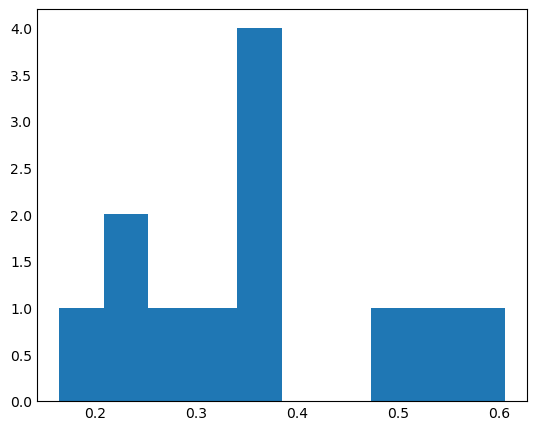

In [9]:
fig, axs = plt.subplots(1, 1, figsize = (5,4))
axs.hist(redecResults['Forward Barrier'])


In [10]:
redecResults

,Composition,Decoration,Transition,Initial State,Final State,Forward Barrier,Reverse Barrier,KRA,dE,Init Can Label,Init non-Can Label,Fin Can Label,Fin non-Can Label,Trans Can Label,Trans non-Can Label,Initial Energy,Final Energy
0,"0.7,0.3",1,1,<HopDec.State.State object at 0x13c2f5820>,<HopDec.State.State object at 0x13c1e1a60>,0.3024,0.5133,0.4078,-0.2109,ca6619e8d2e381822edd8f3ad869a606,dcd07bf53ac93bc0ffc632b3ba56b50e,ca6619e8d2e381822edd8f3ad869a606,dcd07bf53ac93bc0ffc632b3ba56b50e,2802664d020f193268b7976587253248,ee0ba4508c8ceb1c2706fbd67c6647ca,-8437.290880,-8437.501788
1,"0.7,0.3",2,1,<HopDec.State.State object at 0x14a3d0590>,<HopDec.State.State object at 0x13c1e0500>,0.1640,0.3831,0.2736,-0.2191,e92a101135c8fa647b753cd24f4920d1,caf1d21bfea8179b313b4156f93df53e,e92a101135c8fa647b753cd24f4920d1,caf1d21bfea8179b313b4156f93df53e,cfc07cdd2f08063cb7dd4bfc56b08e82,73a79b41b6b4383a7ccb984470eada6d,-8440.604853,-8440.823979
2,"0.7,0.3",3,1,<HopDec.State.State object at 0x14a3d0980>,<HopDec.State.State object at 0x13c1e0380>,0.4965,0.4498,0.4732,0.0468,542e9674388b89db9e7c9c973b1ec5fe,caf1d21bfea8179b313b4156f93df53e,542e9674388b89db9e7c9c973b1ec5fe,caf1d21bfea8179b313b4156f93df53e,f2ad55249bddebd1909acb844341203e,73a79b41b6b4383a7ccb984470eada6d,-8439.750174,-8439.703408
3,"0.7,0.3",4,1,<HopDec.State.State object at 0x14a3d1250>,<HopDec.State.State object at 0x14c2c4830>,0.3733,0.3022,0.3378,0.0711,d951422aa317183b8210a82d7bc20798,4904e3276c37994e04b1c01e65dfcdf3,d951422aa317183b8210a82d7bc20798,4904e3276c37994e04b1c01e65dfcdf3,a68ae516e5413969159a6d4d5c8bad63,2ee3669624c784ccdd0954c350466274,-8441.922073,-8441.850965
4,"0.7,0.3",5,1,<HopDec.State.State object at 0x14a3d2060>,<HopDec.State.State object at 0x14c2c49e0>,0.3555,0.4579,0.4067,-0.1024,aa566dc391d1a04772f2c7aba86eddce,caf1d21bfea8179b313b4156f93df53e,aa566dc391d1a04772f2c7aba86eddce,caf1d21bfea8179b313b4156f93df53e,b63056727141803e9b94200ac901e95f,6396681ad3bc11afc96286032ac191fe,-8438.946488,-8439.048932
5,"0.7,0.3",6,1,<HopDec.State.State object at 0x13d2925a0>,<HopDec.State.State object at 0x14c2c4cb0>,0.6051,0.5576,0.5814,0.0476,e85a54a28c23abdf37c7d0c47bf26a2d,caf1d21bfea8179b313b4156f93df53e,a4f8152ce72c510d5b90243d1bb61e15,93bbc599948ed1fd82c6a2deaabc4217,6dedee3a6f953ba0e93e0f3e7963987d,e3186f51d296d11ebc7862375cb35896,-8437.827016,-8437.779445
6,"0.7,0.3",7,1,<HopDec.State.State object at 0x14a3d1760>,<HopDec.State.State object at 0x14c2c4d70>,0.5309,0.1954,0.3632,0.3355,a3b7a689e02ce274a154da2da5fb87b1,caf1d21bfea8179b313b4156f93df53e,a3b7a689e02ce274a154da2da5fb87b1,caf1d21bfea8179b313b4156f93df53e,de5f8f8d0a9951e6ba3ec9ba4f245ba0,73a79b41b6b4383a7ccb984470eada6d,-8432.621018,-8432.285499
7,"0.7,0.3",8,1,<HopDec.State.State object at 0x13c714500>,<HopDec.State.State object at 0x14c2c4e30>,0.2474,0.3053,0.2764,-0.0579,2482774f9604a199979ce8b3113bbb8f,caf1d21bfea8179b313b4156f93df53e,2482774f9604a199979ce8b3113bbb8f,caf1d21bfea8179b313b4156f93df53e,ffd9dd8cdc519a9737c4d18d8dca4b52,73a79b41b6b4383a7ccb984470eada6d,-8443.013816,-8443.071687
8,"0.7,0.3",8,2,<HopDec.State.State object at 0x13c715df0>,<HopDec.State.State object at 0x14c2c4ef0>,0.2232,0.2565,0.2398,-0.0333,2482774f9604a199979ce8b3113bbb8f,caf1d21bfea8179b313b4156f93df53e,2482774f9604a199979ce8b3113bbb8f,caf1d21bfea8179b313b4156f93df53e,ffd9dd8cdc519a9737c4d18d8dca4b52,73a79b41b6b4383a7ccb984470eada6d,-8443.071687,-8443.105011
9,"0.7,0.3",8,3,<HopDec.State.State object at 0x13c7160c0>,<HopDec.State.State object at 0x14c2c4f20>,0.3684,0.0884,0.2284,0.2800,2482774f9604a199979ce8b3113bbb8f,caf1d21bfea8179b313b4156f93df53e,2482774f9604a199979ce8b3113bbb8f,caf1d21bfea8179b313b4156f93df53e,ffd9dd8cdc519a9737c4d18d8dca4b52,73a79b41b6b4383a7ccb984470eada6d,-8443.105011,-8442.825041
